<a href="https://colab.research.google.com/github/Maseera-Patni-20/S-P-500-Index-Prediction/blob/main/S%26P500.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**INTRODUCTION**

---

The task performed by this notebook-S&P 500 Index Prediction Using Random Forest Classifier.

---
This project uses historical data from the S&P 500 index to predict whether the closing price will go up or down on the next trading day. By leveraging the yfinance library to download the data and utilizing a Random Forest Classifier for our predictive model, we aim to build a tool that can help make informed trading decisions based on historical price patterns. The project involves data collection, data preparation, feature engineering, model training and testing, and backtesting to evaluate the model's performance.


**Project Steps-**


*  Data Collection: Downloading historical data for the S&P 500 index.





*   Data Preparation: Cleaning and preparing the data for analysis.

*   Feature Engineering: Creating new predictors to improve model accuracy.
*   Model Training and Testing: Using a Random Forest Classifier to train and test our model.


*   Backtesting: Evaluating the model's performance over historical data.tem






Data **Collection**

In [ ]:
# this lib downloads yahoo finance api to give data
import yfinance as yf

In [ ]:
#enable us to price history for a single symbol  here symbbol=GSPC which is the S&P 500 index
sp500=yf.Ticker("^GSPC")

In [ ]:
#This will fetch data from very beginning since the time this index was created
sp500=sp500.history(period="max")

In [ ]:
#Displaying the dataframe
sp500
#Each row=price on single trading day
#Non trading days not included in the data

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,0.0,0.0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,0.0,0.0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,0.0,0.0
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
...,...,...,...,...,...,...,...
2024-06-11 00:00:00-04:00,5353.000000,5375.950195,5327.250000,5375.319824,3568030000,0.0,0.0
2024-06-12 00:00:00-04:00,5409.129883,5447.250000,5409.129883,5421.029785,3962840000,0.0,0.0
2024-06-13 00:00:00-04:00,5441.930176,5441.930176,5402.509766,5433.740234,3530380000,0.0,0.0


**Data Preparation**

In [ ]:
#Checking the data range of the data
p500.index

DatetimeIndex(['1927-12-30 00:00:00-05:00', '1928-01-03 00:00:00-05:00',
               '1928-01-04 00:00:00-05:00', '1928-01-05 00:00:00-05:00',
               '1928-01-06 00:00:00-05:00', '1928-01-09 00:00:00-05:00',
               '1928-01-10 00:00:00-05:00', '1928-01-11 00:00:00-05:00',
               '1928-01-12 00:00:00-05:00', '1928-01-13 00:00:00-05:00',
               ...
               '2024-06-04 00:00:00-04:00', '2024-06-05 00:00:00-04:00',
               '2024-06-06 00:00:00-04:00', '2024-06-07 00:00:00-04:00',
               '2024-06-10 00:00:00-04:00', '2024-06-11 00:00:00-04:00',
               '2024-06-12 00:00:00-04:00', '2024-06-13 00:00:00-04:00',
               '2024-06-14 00:00:00-04:00', '2024-06-17 00:00:00-04:00'],
              dtype='datetime64[ns, America/New_York]', name='Date', length=24231, freq=None)

<Axes: xlabel='Date'>

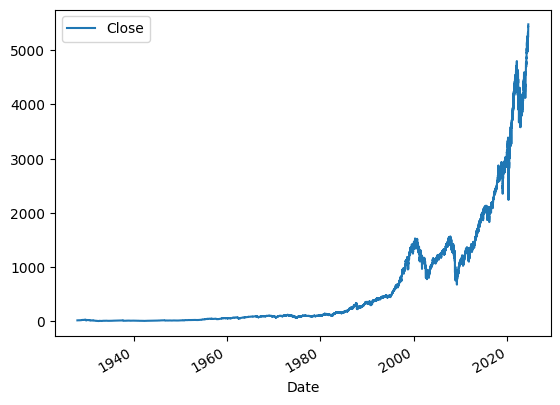

In [ ]:
#Plotting the closing prices
sp500.plot.line(y="Close",use_index=True)

In [ ]:
#Removing columns that are not needed for the analysis
del sp500["Dividends"]
del sp500["Stock Splits"]

In [ ]:
#Displaying the dataframe
sp500

,Open,High,Low,Close,Volume
Date,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0
...,...,...,...,...,...
2024-06-11 00:00:00-04:00,5353.000000,5375.950195,5327.250000,5375.319824,3568030000
2024-06-12 00:00:00-04:00,5409.129883,5447.250000,5409.129883,5421.029785,3962840000
2024-06-13 00:00:00-04:00,5441.930176,5441.930176,5402.509766,5433.740234,3530380000


In [ ]:
#Target=Will the price go up or down tomorrow
sp500["Tomorrow"]=sp500["Close"].shift(-1)

In [ ]:
#Displaying the Dataframe
sp500

,Open,High,Low,Close,Volume,Tomorrow
Date,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.760000
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,17.719999
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,17.549999
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,17.660000
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.500000
...,...,...,...,...,...,...
2024-06-11 00:00:00-04:00,5353.000000,5375.950195,5327.250000,5375.319824,3568030000,5421.029785
2024-06-12 00:00:00-04:00,5409.129883,5447.250000,5409.129883,5421.029785,3962840000,5433.740234
2024-06-13 00:00:00-04:00,5441.930176,5441.930176,5402.509766,5433.740234,3530380000,5431.600098


In [ ]:
#Creating the target variable (1 if price goes up, 0 if price goes down)
sp500["Target"]=(sp500["Tomorrow"]>sp500["Close"]).astype(int)

In [ ]:
#Displaying the Dataframe
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.760000,1
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,17.719999,0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,17.549999,0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,17.660000,1
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.500000,0
...,...,...,...,...,...,...,...
2024-06-11 00:00:00-04:00,5353.000000,5375.950195,5327.250000,5375.319824,3568030000,5421.029785,1
2024-06-12 00:00:00-04:00,5409.129883,5447.250000,5409.129883,5421.029785,3962840000,5433.740234,1
2024-06-13 00:00:00-04:00,5441.930176,5441.930176,5402.509766,5433.740234,3530380000,5431.600098,0


In [ ]:
#Using data from 1990 onwards
sp500=sp500.loc["1990-01-01":].copy()

In [ ]:
#Displaying the Dataframe
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1990-01-02 00:00:00-05:00,353.399994,359.690002,351.980011,359.690002,162070000,358.760010,0
1990-01-03 00:00:00-05:00,359.690002,360.589996,357.890015,358.760010,192330000,355.670013,0
1990-01-04 00:00:00-05:00,358.760010,358.760010,352.890015,355.670013,177000000,352.200012,0
1990-01-05 00:00:00-05:00,355.670013,355.670013,351.350006,352.200012,158530000,353.790009,1
1990-01-08 00:00:00-05:00,352.200012,354.239990,350.540009,353.790009,140110000,349.619995,0
...,...,...,...,...,...,...,...
2024-06-11 00:00:00-04:00,5353.000000,5375.950195,5327.250000,5375.319824,3568030000,5421.029785,1
2024-06-12 00:00:00-04:00,5409.129883,5447.250000,5409.129883,5421.029785,3962840000,5433.740234,1
2024-06-13 00:00:00-04:00,5441.930176,5441.930176,5402.509766,5433.740234,3530380000,5431.600098,0


**Model Training and Testing**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
#initializing parameters,n_parameters=no of decision trees,higher the parameter higher will be the accuracy,split protects against overfitting,each time the model the random nos generated will be in a predictable sequence
# Initializing and training the Random Forest model
model=RandomForestClassifier(n_estimators=100,min_samples_split=100,random_state=1)
# Splitting the data into training and testing sets
train=sp500.iloc[:-100]
test=sp500.iloc[-100:]
# Defining the predictors
predictors=["Close","Volume","Open","High","Low"]
model.fit(train[predictors],train["Target"])

RandomForestClassifier(min_samples_split=100, random_state=1)

In [ ]:
from sklearn.metrics import precision_score
# Making predictions on the test set
preds=model.predict(test[predictors])

In [ ]:
import pandas as pd
# Making predictions on the test set
preds=pd.Series(preds,index=test.index)

In [ ]:
#Displaying the preds dataframe
preds

Date
2024-01-25 00:00:00-05:00    1
2024-01-26 00:00:00-05:00    1
2024-01-29 00:00:00-05:00    1
2024-01-30 00:00:00-05:00    1
2024-01-31 00:00:00-05:00    1
                            ..
2024-06-11 00:00:00-04:00    1
2024-06-12 00:00:00-04:00    1
2024-06-13 00:00:00-04:00    1
2024-06-14 00:00:00-04:00    1
2024-06-17 00:00:00-04:00    1
Length: 100, dtype: int64

In [ ]:
# Evaluating the model's precision
precision_score(test["Target"],preds)

0.55

In [ ]:
# Plotting the actual vs predicted values
combined=pd.concat([test["Target"],preds],axis=1)

<Axes: xlabel='Date'>

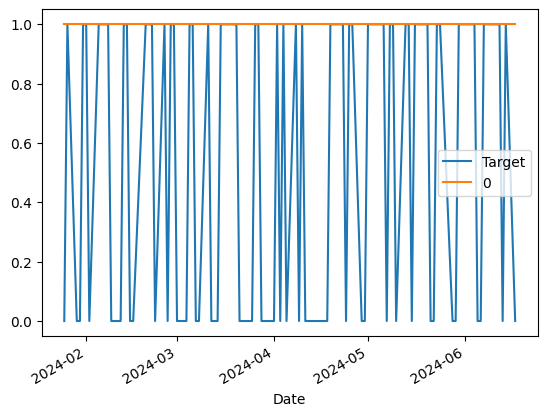

In [ ]:
# Plotting the actual vs predicted values
combined.plot()

**Backtesting Function**

In [ ]:
# Function to predict and evaluate the model
def predict(train,test,predictors,model):
  model.fit(train[predictors],train["Target"])
  preds=model.predict(test[predictors])
  preds=pd.Series(preds,index=test.index
  ,name="Predictions")
  combined=pd.concat([test["Target"],preds],axis=1)
  return combined

In [ ]:
# Function to backtest the model
def backtest(data,model,predictors,start=2500,step=250):
  all_predictions=[]

  for i in range(start,data.shape[0],step):
    train=data.iloc[0:i].copy()
    test=data.iloc[i:(i+step)].copy()
    predictions=predict(train,test,predictors,model)
    all_predictions.append(predictions)
  return pd.concat(all_predictions)

In [ ]:
# Performing backtesting on the dataset
predictions=backtest(sp500,model,predictors)

In [ ]:
# Checking the prediction distribution
predictions["Predictions"].value_counts()

Predictions
0    3585
1    2596
Name: count, dtype: int64

In [ ]:
# Evaluating the precision of the predictions
precision_score(predictions["Target"],predictions["Predictions"])

0.5288906009244992

In [ ]:
# Checking the target distribution
predictions["Target"].value_counts()/predictions.shape[0]

Target
1    0.535027
0    0.464973
Name: count, dtype: float64

**Improving Model Accuracy with More Predictors**

In [ ]:
#Trying to improve accuracy through more predictors
# Creating new predictors to improve model accuracy
horizons=[2,5,60,250,1000]
new_predictors=[]

for horizon in horizons:
  rolling_averages=sp500.rolling(horizon).mean()

  ratio_column=f"Close_Ratio_{horizon}"
  sp500[ratio_column]=sp500["Close"]/rolling_averages["Close"]

  trend_column=f"Trend_{horizon}"
  sp500[trend_column]=sp500.shift(1).rolling(horizon).sum()["Target"]

  new_predictors+=[ratio_column,trend_column]

In [ ]:
# Dropping rows with missing values
sp500=sp500.dropna()

In [ ]:
# Displaying the updated dataframe with new predictors
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000
Date,,,,,,,,,,,,,,,,,
1993-12-14 00:00:00-05:00,465.730011,466.119995,462.459991,463.059998,275050000,461.839996,0,0.997157,1.0,0.996617,1.0,1.000283,32.0,1.028047,127.0,1.176082,512.0
1993-12-15 00:00:00-05:00,463.059998,463.690002,461.839996,461.839996,331770000,463.339996,1,0.998681,0.0,0.995899,1.0,0.997329,32.0,1.025151,126.0,1.172676,512.0
1993-12-16 00:00:00-05:00,461.859985,463.980011,461.859985,463.339996,284620000,466.380005,1,1.001621,1.0,0.999495,2.0,1.000311,32.0,1.028274,127.0,1.176163,513.0
1993-12-17 00:00:00-05:00,463.339996,466.380005,463.339996,466.380005,363750000,465.850006,0,1.003270,2.0,1.004991,3.0,1.006561,32.0,1.034781,128.0,1.183537,514.0
1993-12-20 00:00:00-05:00,466.380005,466.899994,465.529999,465.850006,255900000,465.299988,0,0.999431,1.0,1.003784,2.0,1.005120,32.0,1.033359,128.0,1.181856,513.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-06-10 00:00:00-04:00,5341.220215,5365.790039,5331.520020,5360.790039,3622280000,5375.319824,1,1.001289,1.0,1.003664,3.0,1.031883,33.0,1.132566,139.0,1.274758,530.0
2024-06-11 00:00:00-04:00,5353.000000,5375.950195,5327.250000,5375.319824,3568030000,5421.029785,1,1.001353,2.0,1.003229,3.0,1.033823,34.0,1.134670,139.0,1.277522,531.0
2024-06-12 00:00:00-04:00,5409.129883,5447.250000,5409.129883,5421.029785,3962840000,5433.740234,1,1.004234,2.0,1.009236,3.0,1.041707,34.0,1.143307,139.0,1.287680,531.0


**Updated Model Training and Testing**

In [ ]:
# Re-initializing the Random Forest model with updated parameters
model=RandomForestClassifier(n_estimators=200,min_samples_split=50,random_state=1)

In [ ]:
# Function to predict and evaluate the model with probabilities
def predict(train,test,predictors,model):
  model.fit(train[predictors],train["Target"])
  preds=model.predict_proba(test[predictors])[:,1]
  preds[preds>=.6]=1
  preds[preds<.6]=0
  preds=pd.Series(preds,index=test.index,name="Predictions")
  combined=pd.concat([test["Target"],preds],axis=1)
  return combined


In [ ]:
# Performing backtesting with new predictors
predictions=backtest(sp500,model,new_predictors)

In [ ]:
# Checking the prediction distribution
predictions["Predictions"].value_counts()

Predictions
0.0    4344
1.0     836
Name: count, dtype: int64

In [ ]:
# Evaluating the precision of the predictions
precision_score(predictions["Target"],predictions["Predictions"])

0.5741626794258373